In [59]:
import csv
import os
import enchant
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
sns.set()
sns.set_style("ticks")

In [5]:
output_file = os.path.join(
    '..',
    'results',
    'post-ocr-correction',
    'char-to-char-encoder-decoder',
    'english',
    'output-english--pretr-h512-e64-l2-bi-d0.5.csv')

if not os.path.exists(output_file):
    raise Exception('Output file not found')

In [62]:
input_target_folder = os.path.join(
    '..',
    'data',
    'ICDAR2019_POCR_competition_dataset',
    'ICDAR2019_POCR_competition_evaluation_4M_without_Finnish',
    'EN',
    'EN1')

In [74]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

In [76]:
enchant_dict = enchant.Dict("en_US")

In [79]:
invalid_words_per_file = []

input_eval_filepaths = [os.path.join(input_target_folder, x) for x in os.listdir(input_target_folder)]
for input_eval_filepath in input_eval_filepaths:
    with open(input_eval_filepath, 'r', encoding='utf-8') as eval_file:
        file_lines = eval_file.readlines()
        gs_line = file_lines[2][13:]
        
        invalid_words = sum([1 for x in tokenizer.tokenize(gs_line) if x.isalpha() and not enchant_dict.check(x)])
        invalid_words_per_file.append(invalid_words)

In [85]:
print(f'mean: {np.mean(invalid_words_per_file)}')
print(f'median: {np.median(invalid_words_per_file)}')
print(f'max: {max(invalid_words_per_file)}')
print(f'min: {min(invalid_words_per_file)}')

mean: 26.020833333333332
median: 17.5
max: 95
min: 1


In [19]:
inputs = []
predictions = []
targets = []
input_edit_distances = []
predicted_edit_distances = []

with open(output_file, 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if row['Prediction'] == '':
            continue

        inputs.append(row['Input'])
        predictions.append(row['Prediction'])
        targets.append(row['Target'])
        input_edit_distances.append(int(row['Input edit distance']))
        predicted_edit_distances.append(int(row['Predicted edit distance']))

In [44]:
invalid_words_per_line = []
for i, target_line in enumerate(targets):
    target_words = target_line.replace(',', '').replace('.', '').split(' ')[1:-1]
    invalid_words = 0
    for target_word in target_words:
        if target_word == '':
            continue

        is_word_valid = enchant_dict.check(target_word)
        if not is_word_valid:
            invalid_words += 1
    
    invalid_words_per_line.append(invalid_words)
    if invalid_words > 4:
        input_words = inputs[i].replace(',', '').replace('.', '').split(' ')[1:-1]
        print(' '.join(input_words) + ' | ', end='')
        print(' '.join(target_words))

lest the senesshall wolde haue kylled hym We | lest the senesshall wolde haue kylled hym We
in hys thyghe The knyghte stode by whiehe | in hys thyghe The knyghte stode by whiche
and angerly : " My lorde emperour | and angerly : "My lorde emperour
saynge to hym in this wyse : " My lorde I | saynge to hym in this wyse : "My lorde I
tymes bene about he dyde grete dylygence and | tymes bene about he dyde grete dylygence and
he that you so valyauntly receyued : thre tymes | he that you so valyauntly receyued : thre tymes
faybee that played wasa Iuddy: The grea | howbeit hee should haue beene the yeere be‑
„ 0  THE DOGANO 4  St Georgio | No3 THE DOGANO No4 St° Georgio
Maggeri Mailcotta Ramajeri Severadroog & | Maggeri Mailcotta Ramajeri Severndroog &
- - - - Gutlirum Mr COOPER Amund Mr S | - - - - Guthrum Mr COOPER Amund Mr S
Me; ROBINSON Terezine ------ Mrs | Mr ROBINSON Terezine ‐ ‐ ‐ ‐ ‐ ‐ Mrs
of Mm sore) Mr II WALLA C K SADSUSIHC? - - | of Mysore) Mr H WALLACK SADHUSING ‐ ‐
honourably re

In [46]:
print(np.mean(invalid_words_per_line))
print(max(invalid_words_per_line))

1.2244897959183674
7


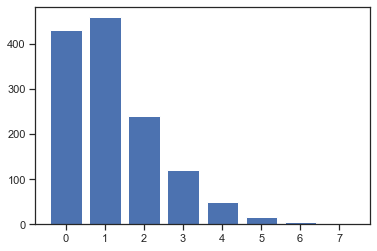

In [60]:
labels, counts = np.unique(invalid_words_per_line, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()